# KHELILI Adrian & SAADALLAH Ahmed

## TP détection d'anomalies

In [7]:
import numpy as np
import sys
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)

### la base de données Mouse

In [8]:
mouse_data = pd.read_csv("./data/mouse.txt",sep=" ",header=None)

In [9]:
mouse_data.shape

(500, 2)

In [10]:
X = mouse_data.iloc[:,0].values
Y = mouse_data.iloc[:,1].values

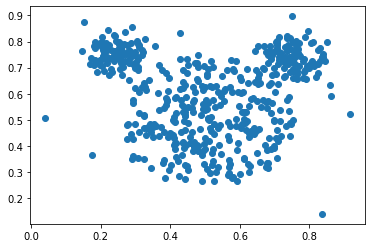

In [11]:
plt.scatter(X,Y)

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [213]:
IF = IsolationForest(n_estimators=100,contamination=0.015, random_state= 5)

In [214]:
outliers = IF.fit_predict(mouse_data.to_numpy())

In [215]:
outliers.shape

(500,)

In [216]:
mouse_data.to_numpy().shape

(500, 2)

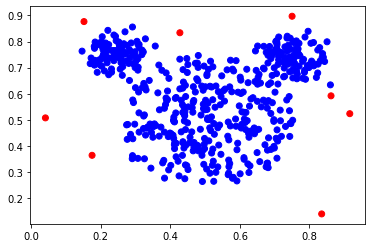

In [217]:
plt.scatter(X,Y, c=np.where(outliers == 1, 'b', 'r'))

In [48]:
DBScan = DBSCAN(eps=0.046, min_samples=3)

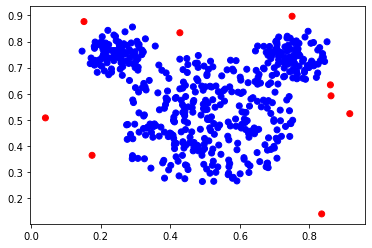

In [50]:
classe = DBScan.fit_predict(mouse_data.to_numpy())
plt.scatter(X,Y, c=np.where(classe == 0, 'b', 'r'))

### le jeu de données des cartes de crédits

In [228]:
creditcard = pd.read_csv("./data/creditcard.csv",sep=",",header=0).to_numpy()

In [229]:
creditcard.shape

(284807, 31)

In [230]:
no_fraud = creditcard[creditcard[:,len(creditcard[0]) - 1] == 0, :]

In [231]:
no_fraud.shape

(284315, 31)

In [232]:
selected_indexes = np.random.randint(len(no_fraud), size=5000)

In [233]:
ins_no_fraud = no_fraud[selected_indexes,:]

In [234]:
ins_fraud = creditcard[creditcard[:,len(creditcard[0]) - 1] == 1, :]

In [235]:
final_ins = np.concatenate((ins_no_fraud, ins_fraud), axis=0)

In [236]:
final_ins.shape

(5492, 31)

In [237]:
X_card = final_ins[:,1:30]
Y_card = np.where(final_ins[:,30:] == 0, 1, -1)

In [238]:
Y_card

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

In [239]:
IF2 = IsolationForest(n_estimators=100)

In [240]:
predict = IF2.fit_predict(X_card)

In [252]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [260]:
print(confusion_matrix(predict, Y_card, labels=[-1,1]))
print("========recall=========")
print(recall_score(predict, Y_card))

[[ 283   85]
 [ 209 4915]]
========recall=========
0.9592115534738486
